In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use ('ggplot')

%matplotlib inline

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Assessing cols (year, against released) for any data inconsistence
df[['year', 'released']].value_counts

<bound method DataFrame.value_counts of       year                          released
0     1980     June 13, 1980 (United States)
1     1980      July 2, 1980 (United States)
2     1980     June 20, 1980 (United States)
3     1980      July 2, 1980 (United States)
4     1980     July 25, 1980 (United States)
...    ...                               ...
7663  2020  October 23, 2020 (United States)
7664  2020  February 7, 2020 (United States)
7665  2020         April 27, 2020 (Cameroon)
7666  2020   October 1, 2020 (United States)
7667  2020   August 19, 2020 (United States)

[7668 rows x 2 columns]>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
for col in df.columns:
    missingPercentage = np.mean(df[col].isnull())
    print('{}--{:.2f}%'.format(col, missingPercentage))

name--0.00%
rating--0.01%
genre--0.00%
year--0.00%
released--0.00%
score--0.00%
votes--0.00%
director--0.00%
writer--0.00%
star--0.00%
country--0.00%
budget--0.28%
gross--0.02%
company--0.00%
runtime--0.00%


- Change budget, votes,runtime, and gross datatypes to int64 type
- Create a new Year column to match with with the release date
- Display all data with code -- pd.set_option('display.max_row',None)

In [7]:
print(df[['votes', 'budget', 'gross', 'runtime']].value_counts())

votes      budget       gross         runtime
195.0      1200000.0    4.569600e+04  85.0       1
94000.0    130000000.0  1.192404e+08  124.0      1
95000.0    17000000.0   1.820570e+08  103.0      1
           13000000.0   1.787404e+07  155.0      1
           12000000.0   4.212835e+07  128.0      1
                                                ..
28000.0    10000000.0   4.741083e+07  96.0       1
           9000000.0    7.683620e+06  111.0      1
           8000000.0    6.739141e+06  95.0       1
           6000000.0    1.621741e+07  94.0       1
2400000.0  185000000.0  1.005974e+09  152.0      1
Length: 5435, dtype: int64


In [8]:
# Break down of missing values
df[['votes', 'budget', 'gross', 'runtime', 'year', ]].isnull().sum()

votes         3
budget     2171
gross       189
runtime       4
year          0
dtype: int64

In [9]:
#Analyze columns with missing, NaN values
df[['votes', 'budget', 'gross', 'runtime']]

,votes,budget,gross,runtime
0,927000.0,19000000.0,46998772.0,146.0
1,65000.0,4500000.0,58853106.0,104.0
2,1200000.0,18000000.0,538375067.0,124.0
3,221000.0,3500000.0,83453539.0,88.0
4,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...
7663,18.0,7000.0,NaN,90.0
7664,36.0,NaN,NaN,90.0
7665,29.0,58750.0,NaN,NaN
7666,NaN,15000.0,NaN,120.0


In [10]:
# replace the missing values (NaN) will zero
df[['votes', 'budget', 'gross', 'runtime']] = df[['votes', 'budget', 'gross', 'runtime']].fillna(0)

# Check changes
display(df[['votes', 'budget', 'gross', 'runtime']])

,votes,budget,gross,runtime
0,927000.0,19000000.0,46998772.0,146.0
1,65000.0,4500000.0,58853106.0,104.0
2,1200000.0,18000000.0,538375067.0,124.0
3,221000.0,3500000.0,83453539.0,88.0
4,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...
7663,18.0,7000.0,0.0,90.0
7664,36.0,0.0,0.0,90.0
7665,29.0,58750.0,0.0,0.0
7666,0.0,15000.0,0.0,120.0


In [11]:
# check datatypes
df[['votes', 'budget', 'gross', 'runtime']].dtypes

votes      float64
budget     float64
gross      float64
runtime    float64
dtype: object

In [12]:
# remove superceeding zeros from columns (votes, budget, gross, and runtime)
# By converting the cols to int type

df[['votes', 'budget', 'gross', 'runtime']] = df[['votes', 'budget', 'gross', 'runtime']].astype('int64')

# check datatype updates
display(df[['votes', 'budget', 'gross', 'runtime']].dtypes)

# display changes
display(df[['votes', 'budget', 'gross', 'runtime']])

votes      int64
budget     int64
gross      int64
runtime    int64
dtype: object

,votes,budget,gross,runtime
0,927000,19000000,46998772,146
1,65000,4500000,58853106,104
2,1200000,18000000,538375067,124
3,221000,3500000,83453539,88
4,108000,6000000,39846344,98
...,...,...,...,...
7663,18,7000,0,90
7664,36,0,0,90
7665,29,58750,0,0
7666,0,15000,0,120


In [13]:
# Next: create a new 'Year' column reflecting the correct release date
df.released

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [14]:
# # seperate released year from the released date col
# df['releasedYear'] = df['released'].str.split(r'[,(]').str[1]

# #check changes
# df.head()

In [15]:
#change colName datatype to int64
#df['releasedYear'] = df.releasedYear.astype('int64')

#chenck changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7668 non-null   int64  
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7651 non-null   object 
 14  runtime   7668 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 898.7+ KB


In [16]:
#set the parameter to view the entire datoset in one view
# pd.set_option('display.max_row',None)

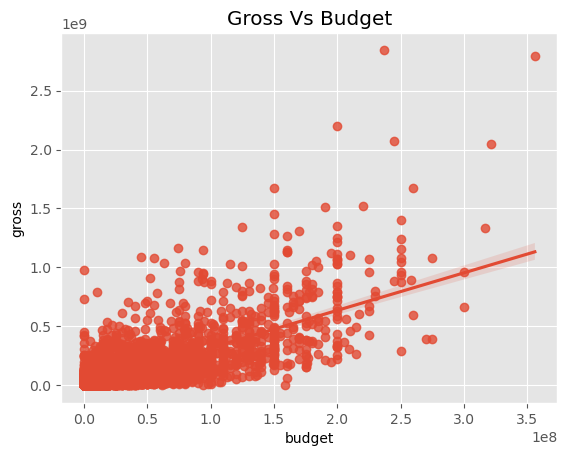

In [17]:
# view correlation betwen budget Vs gross
sns.regplot(x='budget', y='gross', data=df) 
plt.title('Gross Vs Budget')
plt.show()

In [18]:
# assess correlation between Values
df.corr(method='pearson') # other methods include kendall, and spearman


C:\Users\jmute\AppData\Local\Temp\ipykernel_13000\4041458237.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') # other methods include kendall, and spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.116358
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.398387,0.306984,0.268372,0.244339,1.000000


C:\Users\jmute\AppData\Local\Temp\ipykernel_13000\1463816820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = df.corr(method='pearson')


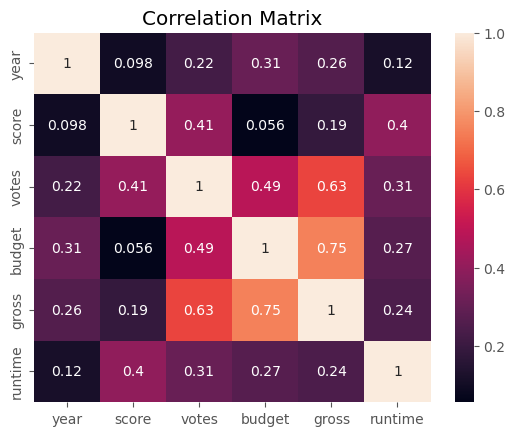

In [19]:
#visualize correlations
correlationMatrix = df.corr(method='pearson')

sns.heatmap(correlationMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [20]:
#Next: Numerize all dataset columns for better analysis
df_numerize = df
for colName in df_numerize.columns:
    if (df_numerize[colName].dtype == 'object'):
        df_numerize[colName] = df_numerize[colName].astype('category')
        df_numerize[colName] = df_numerize[colName].cat.codes

# check changes        
df_numerize.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98


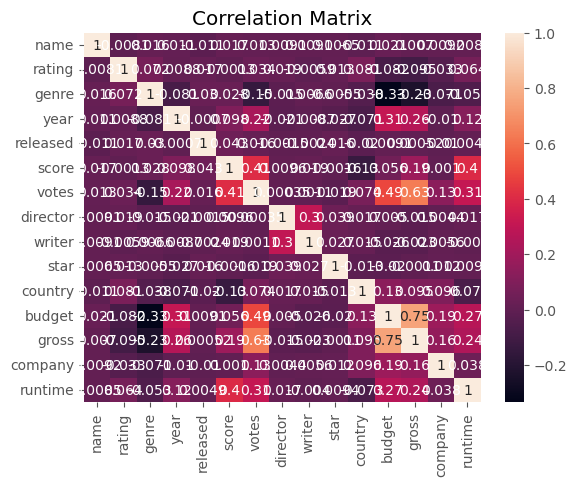

<Figure size 800x800 with 0 Axes>

In [21]:
#visualize entire dataFrame correlations
correlationMatrix = df.corr(method='pearson')

sns.heatmap(correlationMatrix, annot=True)
plt.title('Correlation Matrix')
plt.figure(figsize=(8,8))
plt.show()

In [22]:
# unstack correlations
df_numerize.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.398387
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418


In [23]:
corrPairedFeatures = df_numerize.corr()
corrPairedFeatures.unstack()

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.073319
         budget      0.268372
         gross       0.244339
         company     0.037537
         runtime     1.000000
Length: 225, dtype: float64

In [24]:
sortedFeatures = corrPairedFeatures.sort_values(by='gross')
sortedFeatures

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
country,-0.010737,0.081244,-0.037615,-0.070938,-0.020427,-0.133348,0.073525,0.017490,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.073319
company,0.009211,-0.032943,-0.071067,-0.010431,-0.010474,0.001030,0.133457,0.004404,0.005646,0.012442,0.095548,0.186474,0.156745,1.000000,0.037537
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.398387


In [25]:
#high correlation
highCorr=sortedFeatures[sortedFeatures > 0.5]
highCorr

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
genre,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
released,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
score,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
